### Finding Outliers using Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Define our Dataset
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,14,11,14,13,15,10,15,12,10,14,13,15,10]

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

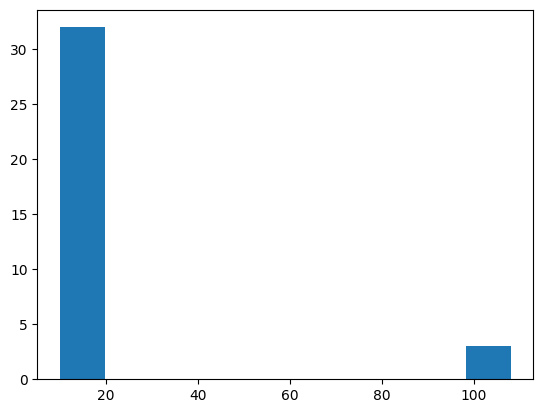

In [3]:
plt.hist(dataset)

In [4]:
## Z-Score
outliers = []
def defect_outliers(data):
    threshold = 3  ## 3 rd standared deviation 
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return outliers

In [5]:
defect_outliers(dataset)

[102, 107, 108]

## IQR
1. Sort the data 
2. Calulate Q1(25%) and Q3(75%)
3. IQR (Q3 - Q1)
4. Find the lower Fence (Q1 - 1.5(IQR))
5. Find the upper Fance (Q3 + 1.5(IQR))

In [6]:
## Sort
dataset = sorted(dataset)
dataset


[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [8]:
q1, q3 = np.percentile(dataset, [25,75])
print(q1, q3)

12.0 15.0


In [11]:
iqr = q3 - q1
print(iqr)




3.0


In [12]:
## Find the lower fence and upper

lower_fence = q1 -(1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print(lower_fence, upper_fence)

7.5 19.5


In [13]:
import seaborn as sns


<Axes: >

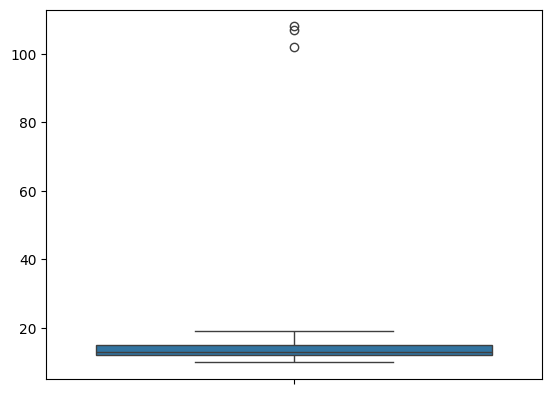

In [14]:
sns.boxplot(dataset)

### Tutorial 15
Statistics of Central Tendency
1. Mean
2. Meadian
3. Mode

In [2]:
ages = [23,24,32,45,12,43,67,45,32,56,32]


In [ ]:
### Find mean and median of givan Data.
import numpy as np
print(np.mean(ages))
print(np.median(ages))

37.36363636363637
32.0


In [8]:
## if we take 100 in our data set then
ages1 = [23,24,32,45,12,43,67,45,32,56,32,120]

In [9]:
print(np.mean(ages1))
print(np.median(ages1))

44.25
37.5


#### So here mean effected by Outlier but Median does not effected by Outliers

In [ ]:
import statistics           ### This is solve by statistics
print(statistics.mean(ages1))
print(statistics.median(ages1))

44.25
37.5


In [ ]:
statistics.mode(ages1) ### Mode can use where more categorical variable present in data 

32

<Axes: >

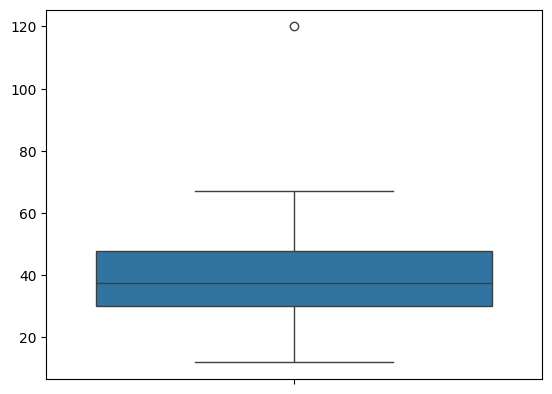

In [13]:
import seaborn as sns
sns.boxplot(ages1)

In [14]:
q1, q3 = np.percentile(ages1, [25,75])
print(q1, q3)

30.0 47.75


In [15]:
### To check outlier[Lower Fence - Higer fence]
IQR = q3 - q1
print(IQR)

17.75


In [16]:
lower_fence = q1 -(1.5*IQR)
upper_fence = q3 + (1.5*IQR)
print(lower_fence, upper_fence)

3.375 74.375


#### Which value lies less then 3.375 and greater then 74.375 those values consider Outliers

## Measure of Dispersion
1. Variance
2. Standarsd Deviation

In [ ]:
statistics.variance(ages1)  ## This is use Sample variance formula divided by (n-1).

795.2954545454545

In [ ]:
np.var(ages1, axis = 0)   ## This is use population Variance formula divided by n.

729.0208333333334

In [23]:
def variance(data):
    n = len(ages1)
    ## mean of the data
    mean = sum(data)/n 
    ## variance
    deviation = [(x - mean)**2 for x in data]
    variance = sum(deviation)/n
    return variance

In [24]:
variance(ages1)

729.0208333333334

In [25]:
def variance(data):
    n = len(ages1)
    ## mean of the data
    mean = sum(data)/n 
    ## variance
    deviation = [(x - mean)**2 for x in data]
    variance = sum(deviation)/(n-1)
    return variance

In [26]:
variance(ages1)

795.2954545454545

In [ ]:
### If you want give your Degree of freedom(dof) if take dof = 0 is population variance and dof = 1 is
### sample variace
def variance(data, dof = 1):
    n = len(ages1)
    ## mean of the data
    mean = sum(data)/n 
    ## variance
    deviation = [(x - mean)**2 for x in data]
    variance = sum(deviation)/(n-dof)
    return variance

In [31]:
variance(ages1, dof=1)

795.2954545454545

In [33]:
statistics.pvariance(ages1)

729.0208333333334

In [35]:
import math
math.sqrt(statistics.pvariance(ages1))


27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

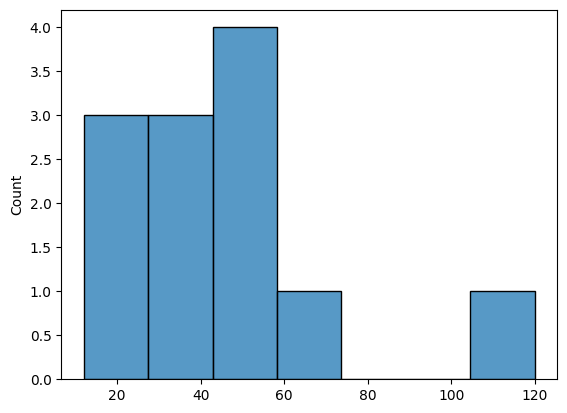

In [38]:
sns.histplot(ages1)

<Axes: ylabel='Count'>

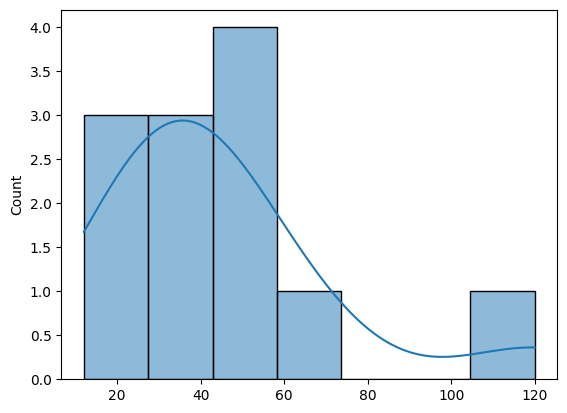

In [39]:
sns.histplot(ages1, kde=True) ### Kernal density estimater

### This curve says is probability density function

## Check whether Disstribution is Normal Distribution

In [40]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample, dist='norm', plot=pylab)
    plt.show()

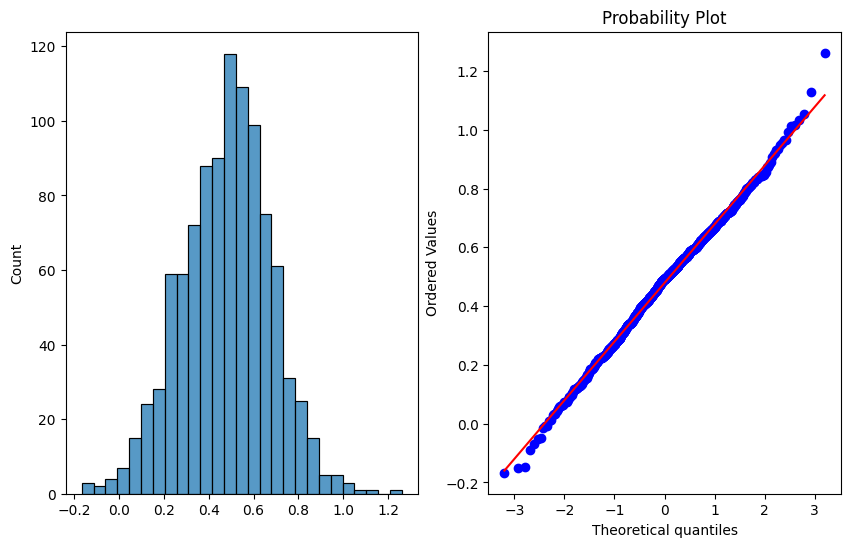

In [41]:
s = np.random.normal(0.5,0.2,1000)
plot_data(s)

##### This is a Normal disstribution becouse graph plot straight line

In [42]:
mu, sigma = 3., 1. ## mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [43]:
def plot_data_log(sample):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample), dist='norm', plot=pylab)
    plt.show()

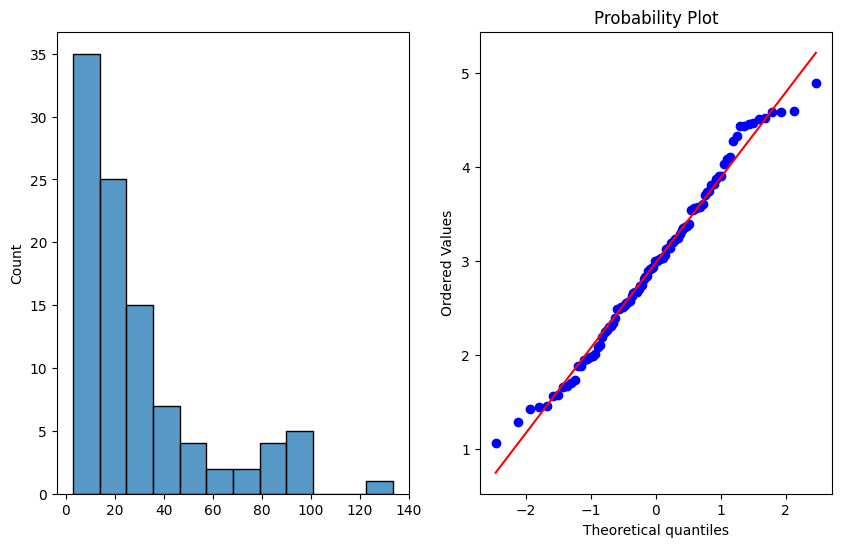

In [44]:
plot_data_log(sample)

#### This is a log normal disstribution